### Data Project 4 | Parte I: EDA
# Clasificación de imágenes de Rayos X
Grupo X: Maria, Franzi y Nacho

## Libraries

In [ ]:
!pip3 install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.3 MB/s eta 0:00:00


In [ ]:
# Data Access and Management
from google.colab import drive
import zipfile
import os
import glob

# Image Processing
import pydicom

# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import random

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

print('Libraries successfully installed.')

Libraries successfully installed.


## Load data from Kaggle
We use the Kaggle API token method to download data from a Kaggle competition in Google Colab:

1. Go to your Kaggle account settings page on the Kaggle website.

2. Scroll down to the section labeled "API" and click on the "Create New API Token" button. This will download a file named "kaggle.json" to your computer that will be then uploaded in GDrive.

3. Upload the "kaggle.json" file from your GDrive to your Google Colab environment.

4. Continue by executing the following code:

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Copy the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the competition data & unzip it
if not os.path.exists('edem-mda-2022-23-data-project-4.zip'):
  !kaggle competitions download -c edem-mda-2022-23-data-project-4
  print('Data downloaded successfully.')
  with zipfile.ZipFile('edem-mda-2022-23-data-project-4.zip', 'r') as data_to_unzip:
    data_to_unzip.extractall('.')
    print('Data extracted successfully.')
else: print('Data already downloaded and extracted successfully.')

Mounted at /content/drive
100% 19.1G/19.1G [03:16<00:00, 127MB/s]
100% 19.1G/19.1G [03:16<00:00, 105MB/s]
Data downloaded successfully.
Data extracted successfully.


## Get a first glance at images

In [ ]:
# Get a list of all train and test DICOM files
all_train_files = glob.glob(f'train/*')
all_test_files = glob.glob(f'test/*')

In [ ]:
# Randomly select 4 train and 4 test files
random_files = random.sample(all_train_files, 4) + random.sample(all_test_files, 4)

# Display the selected DICOM images
plt.figure(figsize=(12, 10))
plt.suptitle("8 Random Images from the Train & Test Dataset")

for i, file in enumerate(random_files):
    ds = pydicom.dcmread(file)
    plt.subplot(2, 4, i+1)
    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

'# Randomly select 4 train and 4 test files\nrandom_files = random.sample(all_train_files, 4) + random.sample(all_test_files, 4)\n\n# Display the selected DICOM images\nplt.figure(figsize=(12, 10))\nplt.suptitle("8 Random Images from the Train & Test Dataset")\n\nfor i, file in enumerate(random_files):\n    file_path = file\n    ds = pydicom.dcmread(file_path)\n    \n    plt.subplot(2, 4, i+1)\n    plt.imshow(ds.pixel_array, cmap=plt.cm.gray)\n    plt.title(f\'Image {i+1}\')\n    plt.axis(\'off\')\n\nplt.tight_layout()\nplt.show()'

## Get metadata of images

In [ ]:
# Get the first DICOM file in the folder train
file_name = next((file for file in os.listdir('train') if file.endswith('.dcm')), None)
file_path = os.path.join('train', file_name)
ds = pydicom.dcmread(file_path)

# Print the available metadata attributes
print(f"Metadata attributes for file: {file_name}")
metadata_list_all = dir(ds)
print(metadata_list_all)

Metadata attributes for file: 1.2.826.0.1.3680043.8.498.13174031198396146354228627906496096728.dcm
['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'CodeValue', 'Columns', 'ContentTime', 'HighBit', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'Manufacturer', 'Modality', 'PatientAge', 'PatientBirthDate', 'PatientID', 'PatientIdentityRemoved', 'PatientName', 'PatientSex', 'PerformedProcedureStepStartTime', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'SeriesDate', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SpecificCharacterSet', 'StudyDate', 'StudyDescription', 'StudyID', 'StudyInstanceUID', 'StudyTime', '__array__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__

In [ ]:
 # Create dictionary to store the attribute values we need
metadata_list = ['SOPInstanceUID', 'PatientAge', 'PatientSex', 'Columns', 'Rows']
metadata_values = {} 

# Initialize the dictionary with empty lists for each metadata attribute
for attribute_name in metadata_list:
    metadata_values[attribute_name] = []

# Iterate over all train files
for file_path in all_train_files:
    ds = pydicom.dcmread(file_path)
    
    # Iterate over the metadata attributes
    for attribute_name in metadata_list:
        # Check if the attribute exists in the DICOM object
        if hasattr(ds, attribute_name):
            attribute_value = getattr(ds, attribute_name)
            
            # Store the attribute value in the dictionary
            metadata_values[attribute_name].append(attribute_value)
        else:
            metadata_values[attribute_name].append(None)

# Create a pandas DataFrame from the metadata values
df_metadata = pd.DataFrame(metadata_values)

# Print the resulting DataFrame
print(df_metadata.head())

                                      SOPInstanceUID BodyPartExamined  \
0  1.2.826.0.1.3680043.8.498.13174031198396146354...                    
1  1.2.826.0.1.3680043.8.498.12946327792923949867...                    
2  1.2.826.0.1.3680043.8.498.50132657620260365226...                    
3  1.2.826.0.1.3680043.8.498.12349604547773643462...                    
4  1.2.826.0.1.3680043.8.498.12414243101975237693...                    

  PatientAge PatientSex                                          PixelData  \
0        75Y             b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...   
1                        b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...   
2                        b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...   
3                        b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...   
4                        b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...   

   Columns  Rows  
0      300   268  
1     4240  3480  
2     4240  3480  
3     3480  4240

In [ ]:
# Define the lambda functions to be applied to each row
func_age = lambda x: int(x.get('PatientAge', 'NaN').replace('Y', '')) if 'PatientAge' in x else float('NaN')
func_sex = lambda x: int(x.get('PatientSex', 'NaN').replace('Y', '')) if 'PatientSex' in x else float('NaN')

# Apply the functions to the columns
df_metadata['PatientAge'] = df_metadata['PatientAge'].apply(func_age)
df_metadata['PatientSex'] = df_metadata['PatientSex'].apply(func_sex)
df_metadata = df_metadata.rename(columns={'Columns': 'Width', 'Rows':'Height'})
df_metadata.head()


TypeError: ignored

## Get target labels (body parts)

In [ ]:
# Load train.csv to get target labels
train_data = pd.read_csv('train.csv')

# Define the bodyparts dictionary
bodyparts_dict = {
    0: 'Abdomen',
    1: 'Tobillo',
    2: 'Columna cervical',
    3: 'Tórax',
    4: 'Clavículas',
    5: 'Codo',
    6: 'Pies',
    7: 'Dedos',
    8: 'Antebrazo',
    9: 'Mano',
    10: 'Cadera',
    11: 'Rodilla',
    12: 'Pierna',
    13: 'Columna lumbar',
    14: 'Otros',
    15: 'Pelvis',
    16: 'Hombro',
    17: 'Senos paranasales',
    18: 'Cráneo',
    19: 'Muslo',
    20: 'Columna torácica',
    21: 'Muñeca'
}

# Add bodypart labels/ target to dataframe
df_metadata = df_metadata.merge(train_data, on='SOPInstanceUID', how='left')
df_metadata['BodyPart'] = df_metadata.Target.map(bodyparts_dict)
df_metadata.head()

,SOPInstanceUID,PatientAge,PatientSex,Width,Height,BodyPart
0,1.2.826.0.1.3680043.8.498.13174031198396146354...,NaN,NaN,300,268,Otros
1,1.2.826.0.1.3680043.8.498.12946327792923949867...,NaN,NaN,4240,3480,Tórax
2,1.2.826.0.1.3680043.8.498.50132657620260365226...,NaN,NaN,4240,3480,Tórax
3,1.2.826.0.1.3680043.8.498.12349604547773643462...,NaN,NaN,3480,4240,Tórax
4,1.2.826.0.1.3680043.8.498.12414243101975237693...,NaN,NaN,4240,3480,Tórax


## EDA

As there are no metadata on the age nor on the sex of the pacients, the EDA focuses only on the width, height nd body parts of the images.

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 1277
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SOPInstanceUID  1278 non-null   object 
 1   PatientAge      0 non-null      float64
 2   PatientSex      0 non-null      float64
 3   Width           1278 non-null   int64  
 4   Height          1278 non-null   int64  
 5   BodyPart        1278 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 69.9+ KB


In [ ]:
df_metadata.describe(include='all')

,SOPInstanceUID,BodyPartExamined,PatientAge,PatientSex,PixelData,Width,Height
count,1278,1278,0.0,0.0,1278,1278.000000,1278.000000
unique,1278,1,NaN,NaN,1274,NaN,NaN
top,1.2.826.0.1.3680043.8.498.13174031198396146354...,,NaN,NaN,b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...,NaN,NaN
freq,1,1278,NaN,NaN,2,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3237.946792,3274.844288
std,NaN,NaN,NaN,NaN,NaN,1011.725482,928.641047
min,NaN,NaN,NaN,NaN,NaN,128.000000,172.000000
25%,NaN,NaN,NaN,NaN,NaN,2320.000000,2920.000000
50%,NaN,NaN,NaN,NaN,NaN,3480.000000,3480.000000
75%,NaN,NaN,NaN,NaN,NaN,4240.000000,4240.000000


In [ ]:
# Count values for 'Height' and 'Width'
df_metadata.value_counts(["Height", "Width"])

Height  Width
3480    4240     439
4240    3480     382
2920    2320     174
2320    1720     103
        2920      78
1720    2320      45
1024    1024      18
192     252        3
230     252        2
2364    2964       2
292     300        2
290     300        2
278     300        2
282     300        2
232     252        1
238     252        1
196     252        1
202     252        1
210     252        1
214     252        1
216     252        1
218     252        1
220     252        1
351     128        1
314     300        1
302     300        1
300     300        1
296     300        1
294     300        1
222     252        1
224     252        1
288     300        1
284     300        1
226     252        1
228     252        1
268     300        1
256     300        1
172     252        1
dtype: int64

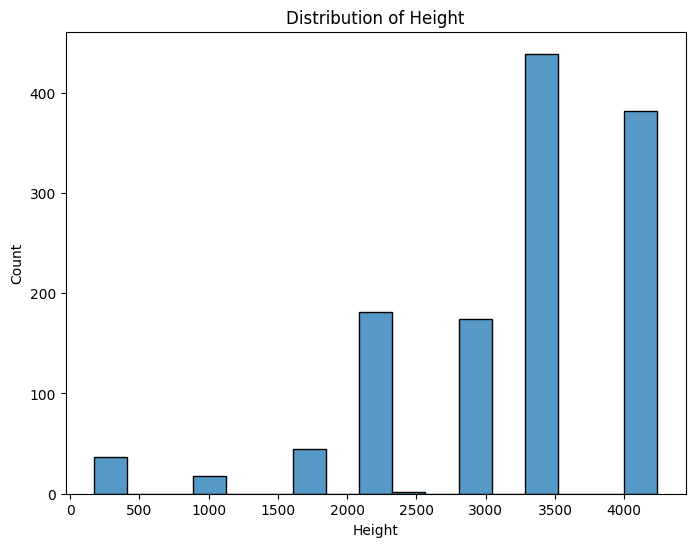

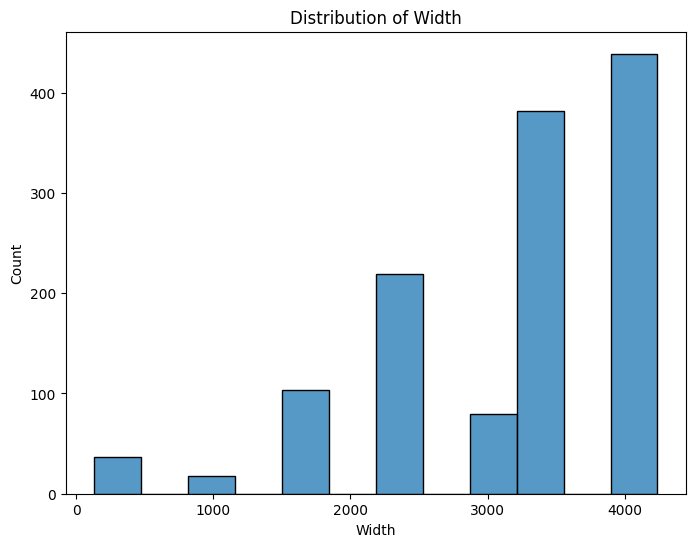

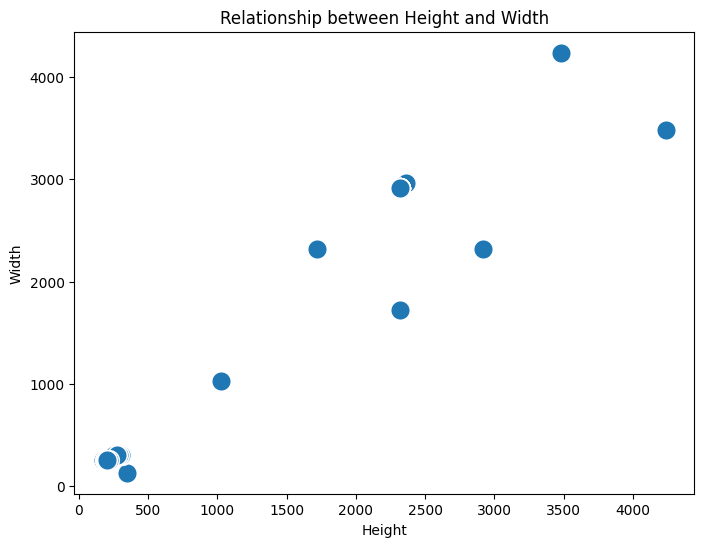

In [ ]:
# Distribution of 'Height'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_metadata, x='Height')
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

# Distribution of 'Width'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_metadata, x='Width')
plt.title('Distribution of Width')
plt.xlabel('Width')
plt.ylabel('Count')
plt.show()

# Relationship between 'Height' and 'Width'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_metadata, x='Height', y='Width', s=200)
plt.title('Relationship between Height and Width')
plt.xlabel('Height')
plt.ylabel('Width')
plt.show()

In [ ]:
# Count values for 'BodyPart'
df_metadata['BodyPart'].value_counts()

Tórax                579
Otros                 96
Rodilla               81
Abdomen               64
Columna cervical      61
Pies                  56
Pelvis                53
Muñeca                50
Hombro                32
Tobillo               32
Columna lumbar        31
Mano                  24
Senos paranasales     18
Codo                  18
Pierna                15
Cadera                15
Dedos                 12
Columna torácica      12
Antebrazo              9
Cráneo                 8
Clavículas             7
Muslo                  5
Name: BodyPart, dtype: int64